## Answer/Execute the following statements:

### RFM and K-Means
1. Load the `new_df` from yesterday.
2. Make a new df `history_df` where you place the RFM per CustomerID.
3. For easier interpretation, convert the RFM values to log scale. (Hint: Use `.apply(math.log)`.
3. Plot the 3 of them vs Amount.
4. Create a 3D plot of RFM by running this (make sure to name your variables accordingly):

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import math
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import scipy
import copy

In [36]:
# 1 Load the new_df from yesterday.
df = pd.read_csv('H_new_df.csv', index_col=0)

In [37]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  amount  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom   15.30  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom   20.34  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom   22.00  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom   20.34  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom   20.34

In [38]:
# 2 Make a new df history_df where you place the RFM per CustomerID.
df['total_price'] = df['Quantity'] * df['UnitPrice']

### Creates RFM
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # turns InvoiceDate to datetime type

reference_date = max(df['InvoiceDate']) + timedelta(days=1) # latest purchase in the whole dataset

df_RFM = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days,
                                       'InvoiceNo': 'count',
                                       'total_price': 'sum'})
df_RFM.head()

InvoiceDate  InvoiceNo  total_price
CustomerID                                     
12346               326          1     77183.60
12347                 2        182      4310.00
12348                75         31      1797.24
12349                19         73      1757.55
12350               310         17       334.40

In [39]:
### Renames columns 
df_RFM = df_RFM.rename(columns={'InvoiceDate':'Recency',
                                'InvoiceNo':'Frequency',
                                'total_price':'Monetary'})

df_RFM.head()

Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2        182   4310.00
12348            75         31   1797.24
12349            19         73   1757.55
12350           310         17    334.40

<font color=red>**Note:**</font> Comment out to disregard log transformation

In [41]:
# 3 For easier interpretation, convert the RFM values to log scale. (Hint: Use .apply(math.log)
df_RFM['Recency'] = df_RFM['Recency'].apply(math.log)
df_RFM['Frequency'] = df_RFM['Frequency'].apply(math.log)
df_RFM['Monetary'] = df_RFM['Monetary'].apply(math.log)

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

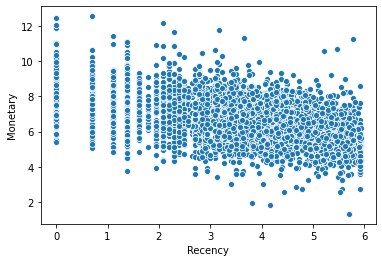

In [42]:
#4 Plot the 3 of them vs Amount.
sns.scatterplot(y=df_RFM['Monetary'], x=df_RFM['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

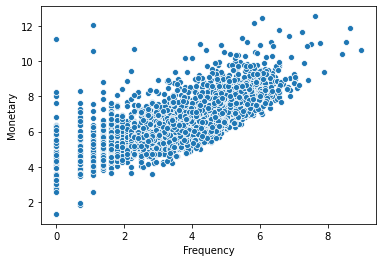

In [43]:
sns.scatterplot(y=df_RFM['Monetary'], x=df_RFM['Frequency'])

<AxesSubplot:xlabel='Frequency', ylabel='Recency'>

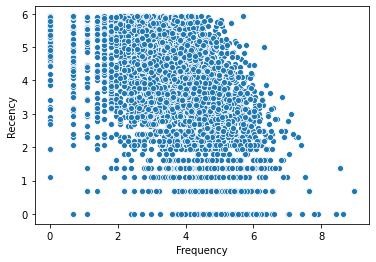

In [44]:
sns.scatterplot(y=df_RFM['Recency'], x=df_RFM['Frequency'])

In [45]:
df_RFM[['Recency','Frequency','Monetary']].corr()

Recency  Frequency  Monetary
Recency    1.000000  -0.485553 -0.484054
Frequency -0.485553   1.000000  0.756749
Monetary  -0.484054   0.756749  1.000000

In [62]:
# 5 Create a 3D plot of RFM by running this (make sure to name your variables accordingly):

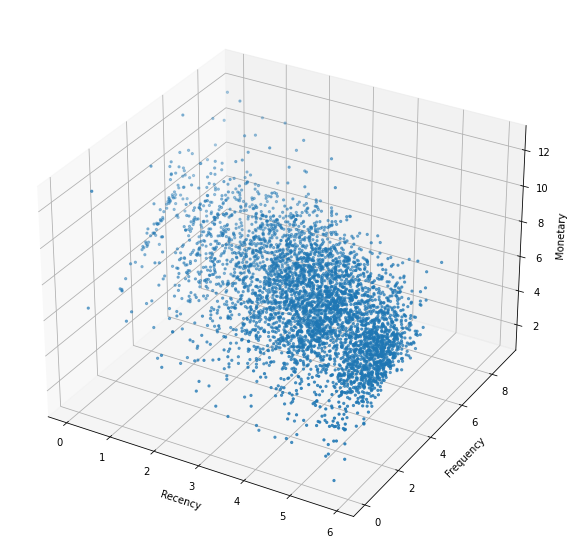

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

r = df_RFM.Recency
f = df_RFM.Frequency
m = df_RFM.Monetary
ax.scatter(r, f, m, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

6. Write down your observations.
7. Prepare the data for clustering by running this (make sure to name your variables accordingly):

In [64]:
# 6 weak corr between freq and amt; rece and amt (nega corr)
# some sort of clustering around the right side of the graph

In [65]:
# 7 Prepare the data for clustering by running this (make sure to name your variables accordingly):

In [47]:
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

feature_vector = ['Recency','Frequency', 'Monetary']
X_subset = df_RFM[feature_vector]
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)

In [48]:
X_scaled

array([[ 1.40989446, -2.77515957,  3.69871931],
       [-2.14649825,  1.1495495 ,  1.410201  ],
       [ 0.38397128, -0.18534723,  0.71641884],
       ...,
       [-1.17860486, -0.90111592, -1.11736527],
       [-1.66255156,  2.22351465,  0.83796882],
       [-0.00442205,  0.42893082,  0.73389579]])

8. Try out 2 <= k <= 20. 
9. Validate what the best k with elbow method, silhouette score, and Davies-Bouldin index.
10. Write down your observations.
11. If it is hard to decide for the best number of k, undo the log scaling and try clustering again.
12. Determine what makes sense in the clustering, and decide what the best k is.
13. To help you further, create a boxplot of clusters for each k for every RFM measure. The less the variance (or thickness of boxplot) the better.
14. Also, explore on adding other freatures per customer such as Country, how long the customer has been a customer, etc.

In [49]:
# 8 Try out 2 <= k <= 20.

In [50]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [51]:
sse,db,slc = {}, {}, {}
for k in range(2, 20):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X_scaled) #random_state impt to reproduce results
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X_scaled,clusters)
    slc[k] = silhouette_score(X_scaled,clusters)
    

### Elbow Method

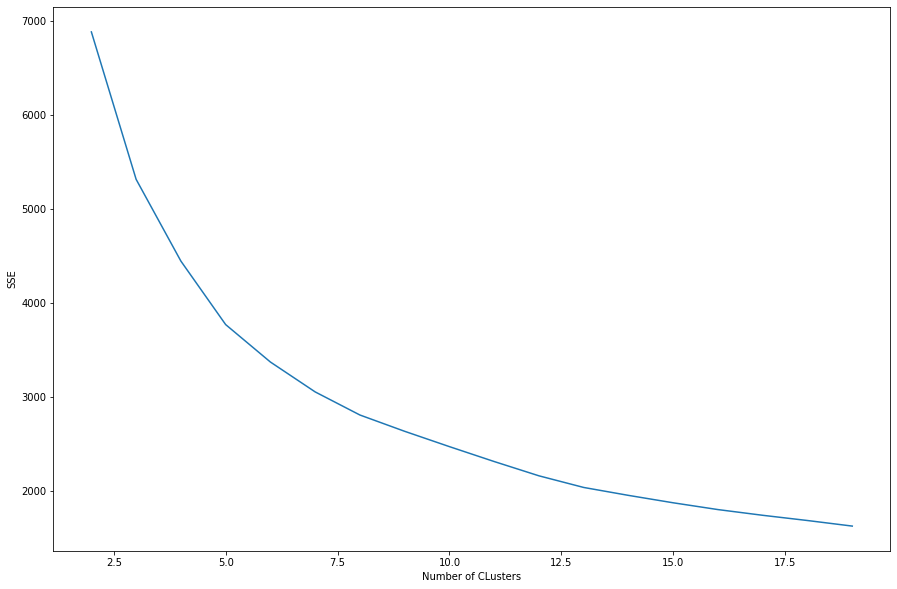

In [52]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Number of CLusters')
plt.ylabel('SSE')
plt.show()

In [72]:
from kneed import *
k1 = KneeLocator(range(2,20), list(sse.values()), curve='convex', direction='decreasing')
k1.elbow

7

### Davies Bouldin

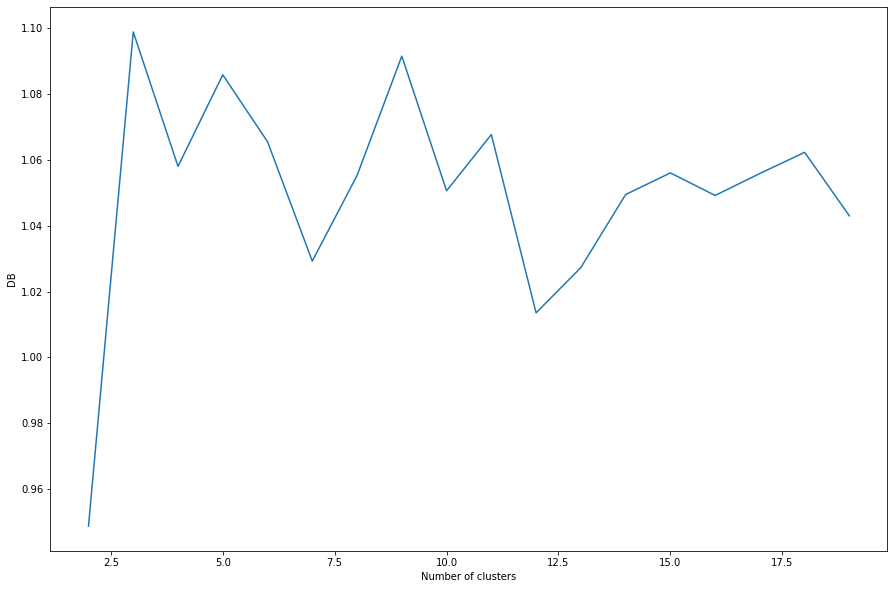

In [53]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel('Number of clusters')
plt.ylabel('DB')
plt.show()

In [54]:
#Minimum value means it is the best cluster
print(list(db.keys())[list(db.values()).index(min(db.values()))])

2


### Silhouette Analysis

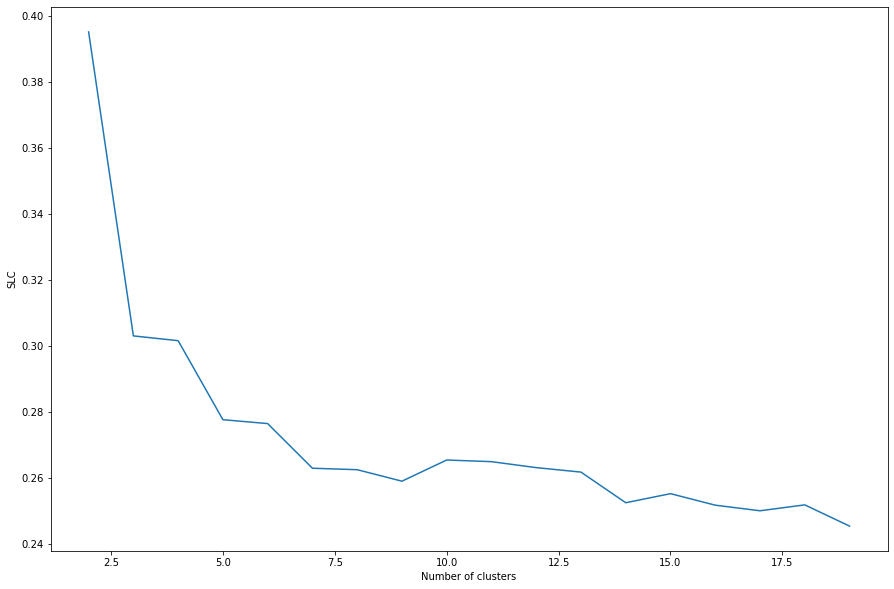

In [75]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel('Number of clusters')
plt.ylabel('SLC')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3952253031244901
For n_clusters = 3 The average silhouette_score is : 0.30313313177410495
For n_clusters = 4 The average silhouette_score is : 0.3020417883661806
For n_clusters = 5 The average silhouette_score is : 0.2778217616945531
For n_clusters = 6 The average silhouette_score is : 0.27655060366929796
For n_clusters = 7 The average silhouette_score is : 0.2630359414042273
For n_clusters = 8 The average silhouette_score is : 0.26273551315568383
For n_clusters = 9 The average silhouette_score is : 0.25913114457062775
For n_clusters = 10 The average silhouette_score is : 0.2655411235831407
For n_clusters = 11 The average silhouette_score is : 0.2649984533582988
For n_clusters = 12 The average silhouette_score is : 0.2632156830781995
For n_clusters = 13 The average silhouette_score is : 0.2618926202705995
For n_clusters = 14 The average silhouette_score is : 0.2525654788298963
For n_clusters = 15 The average silhouette_score is : 0

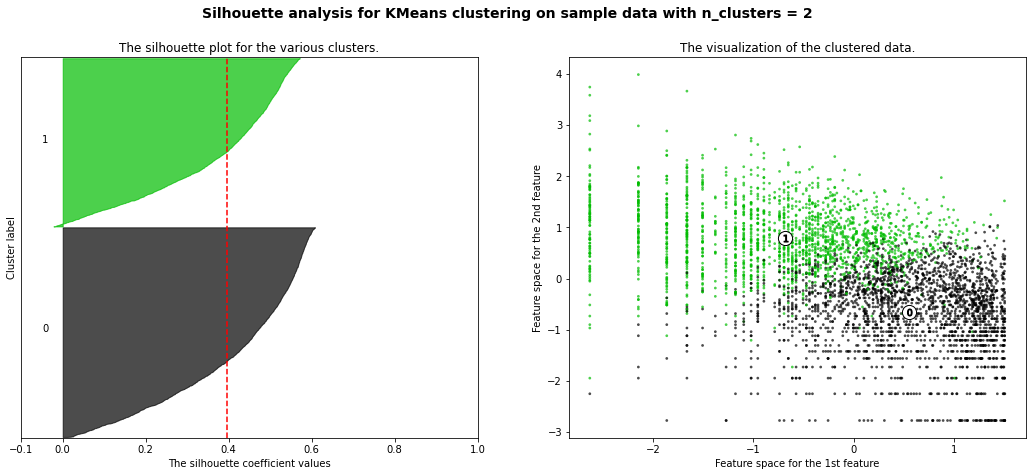

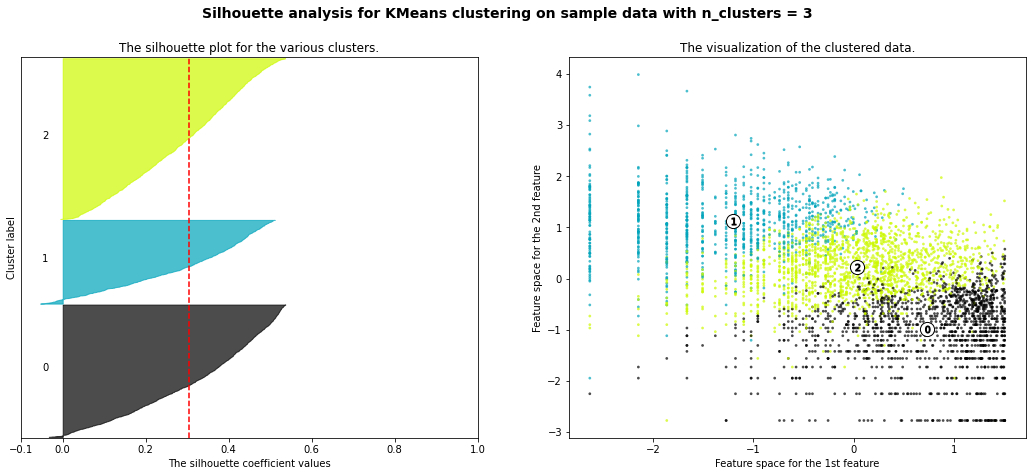

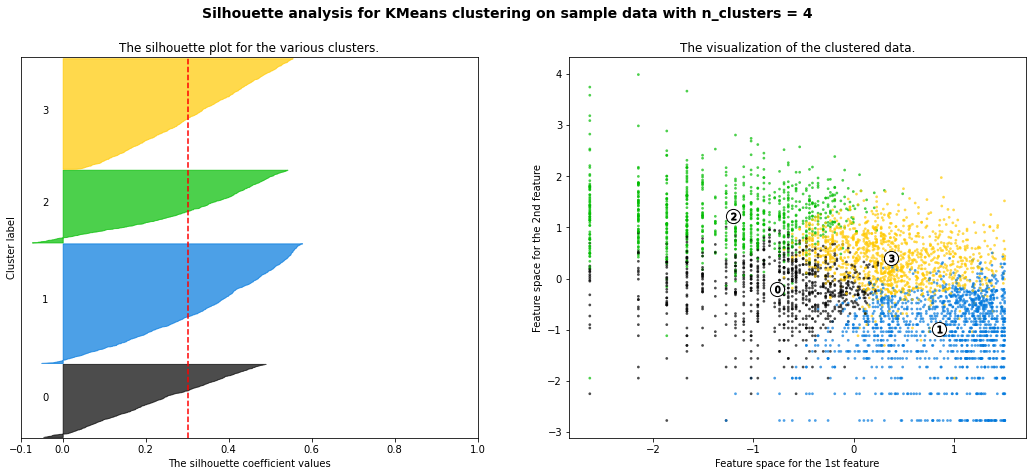

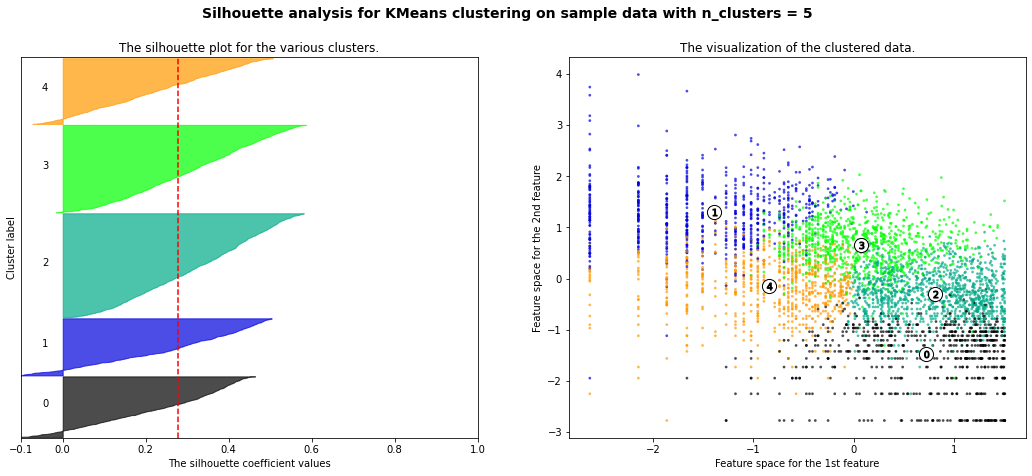

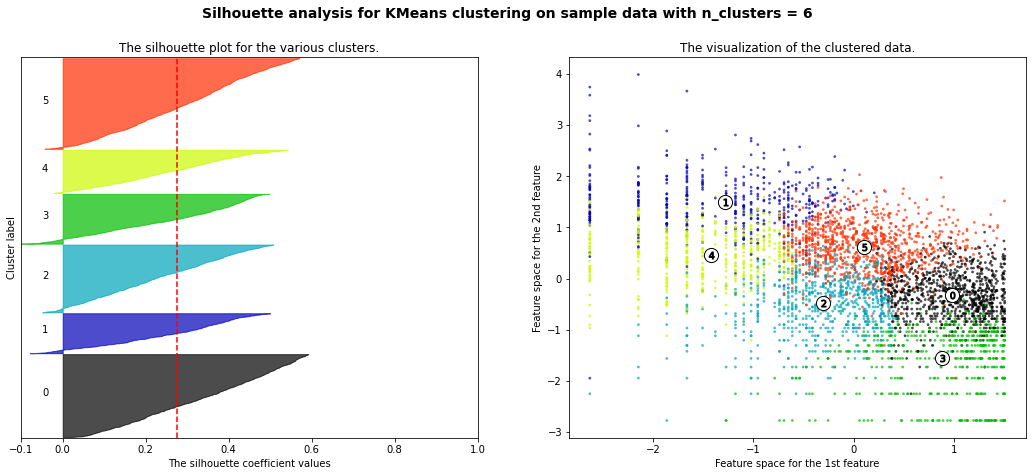

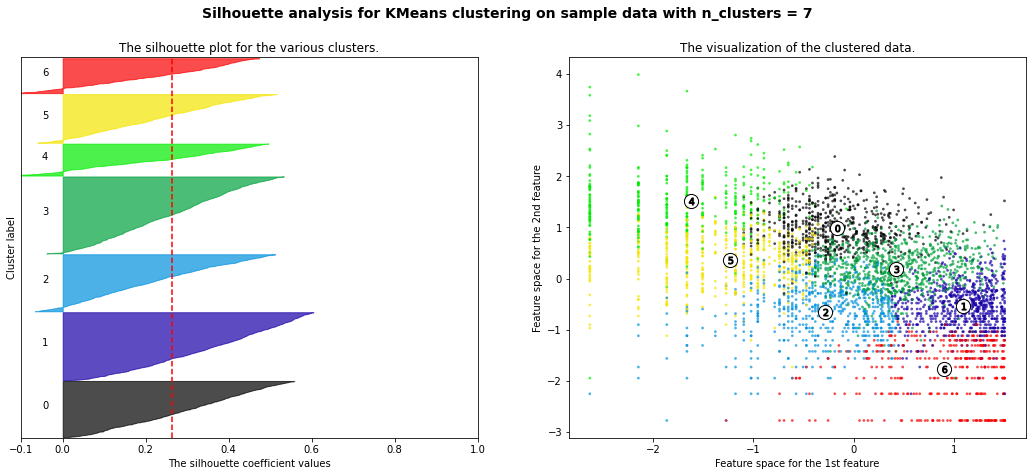

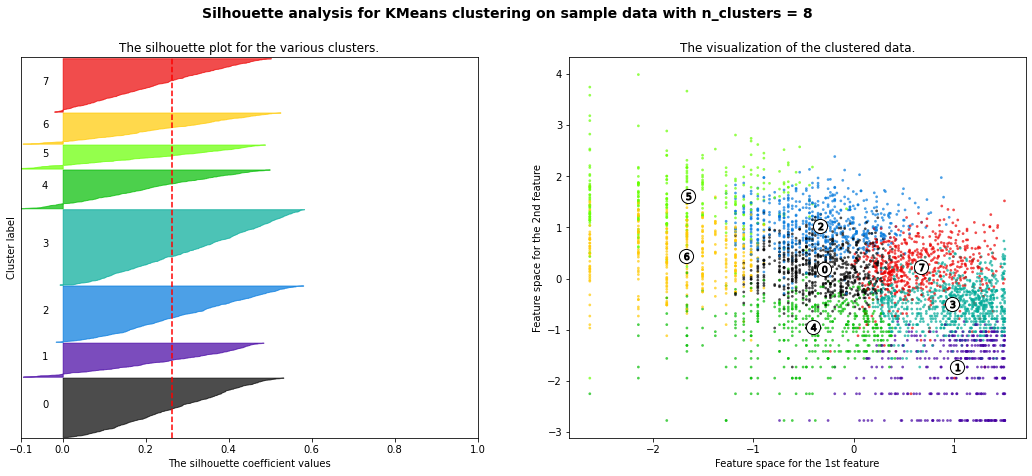

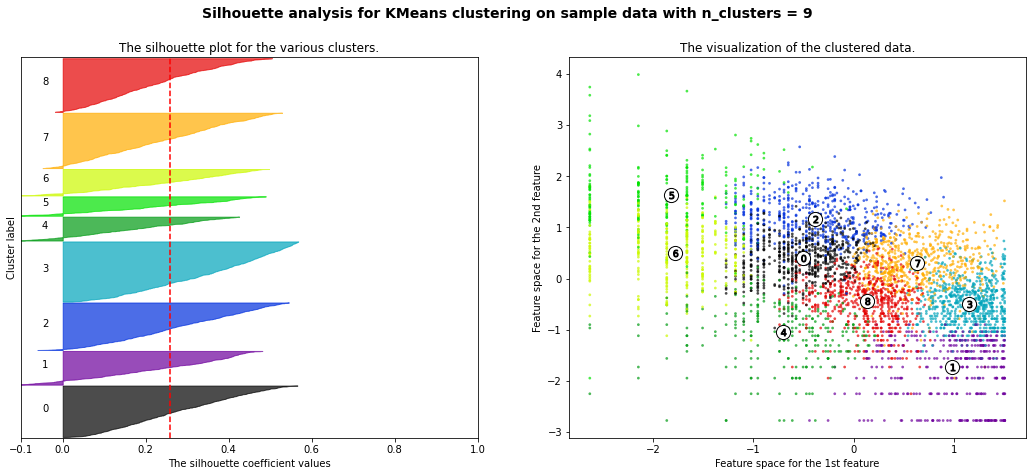

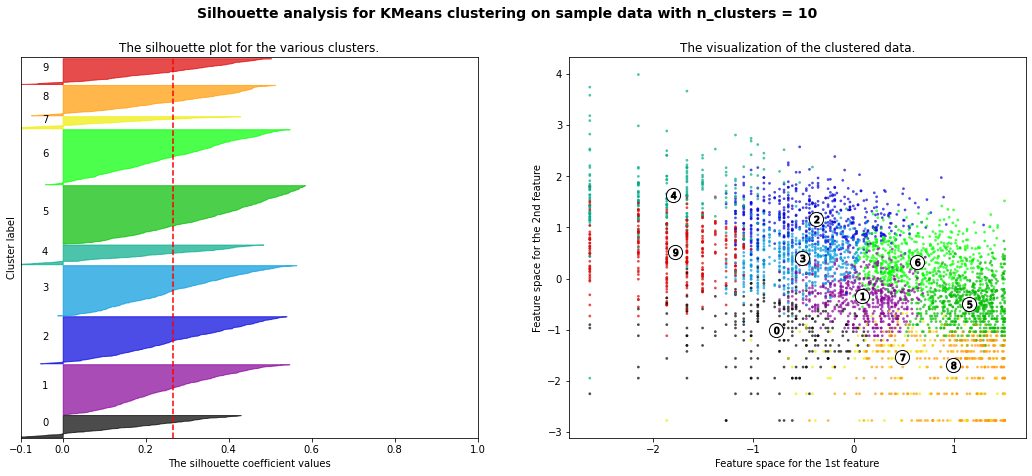

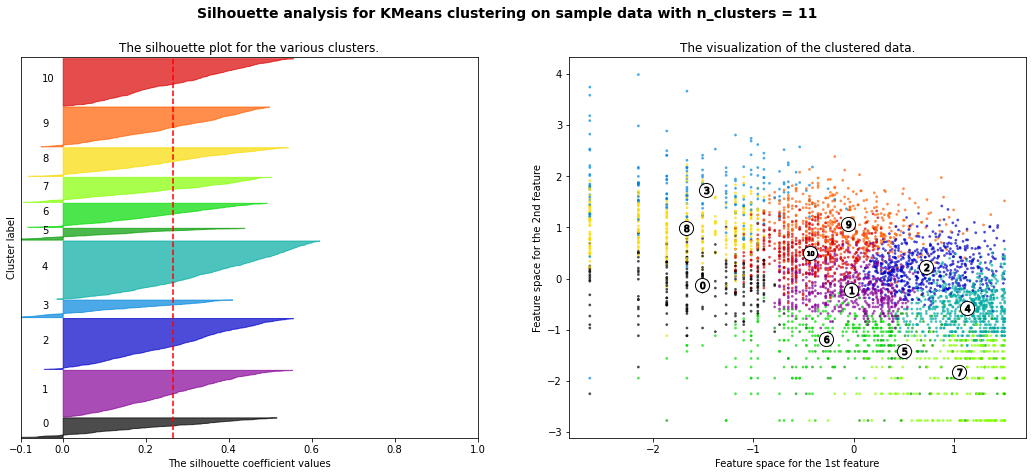

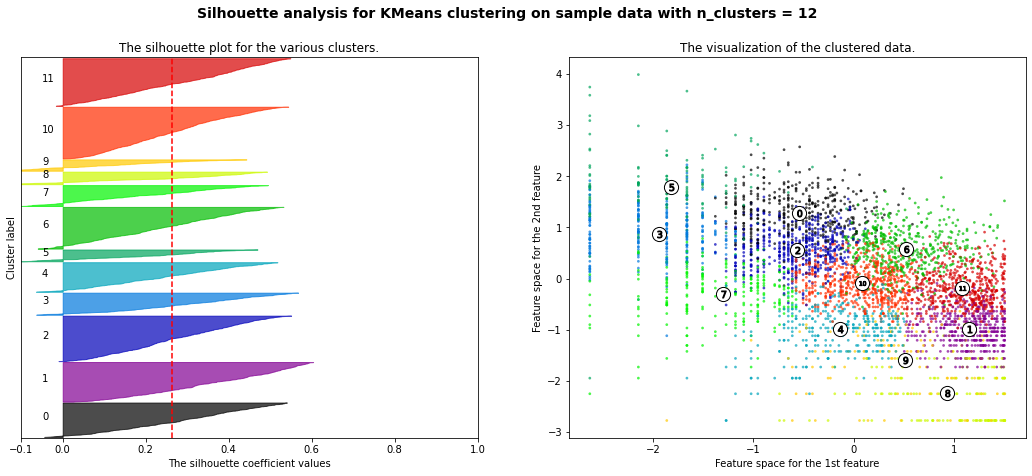

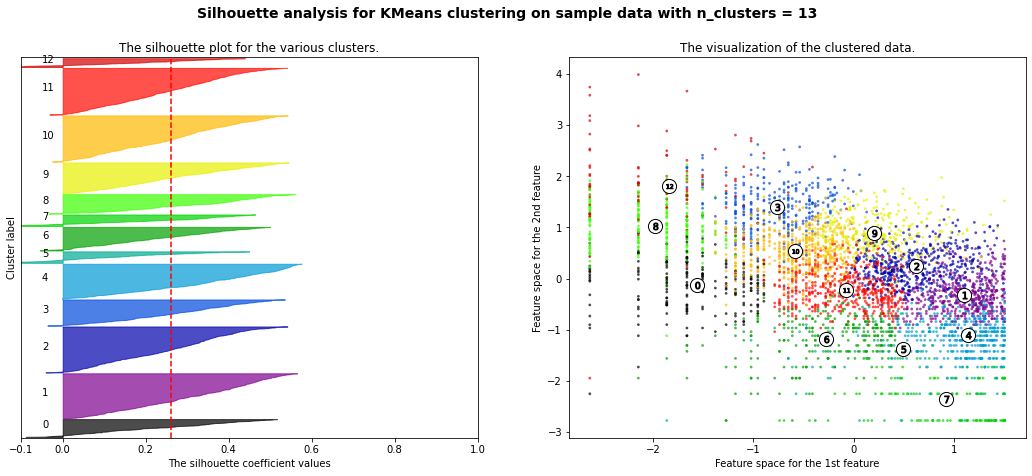

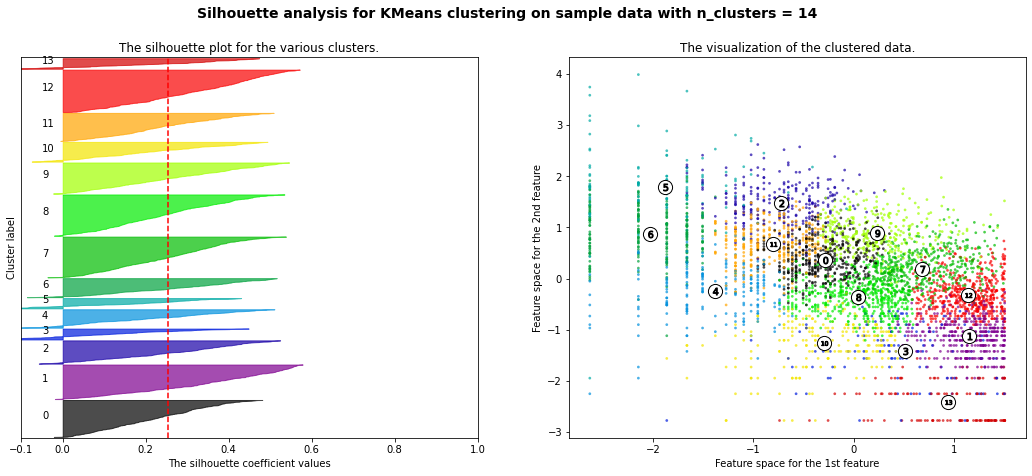

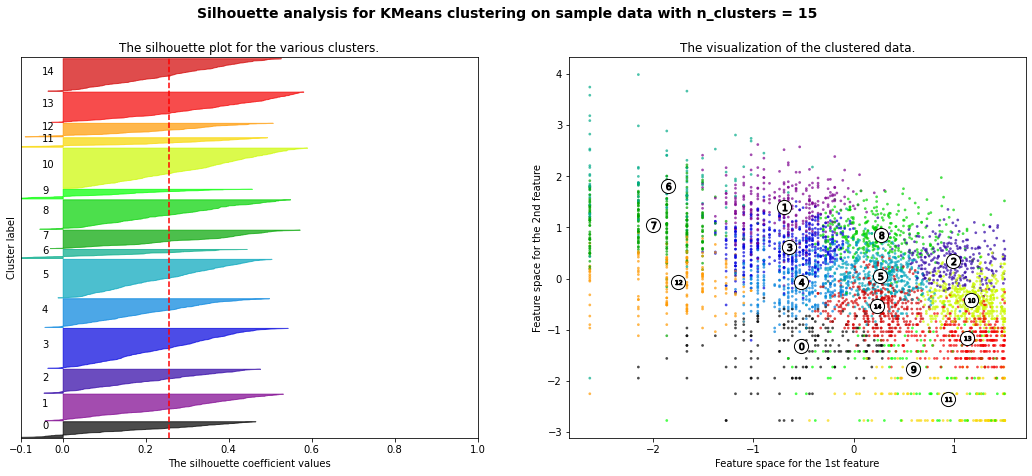

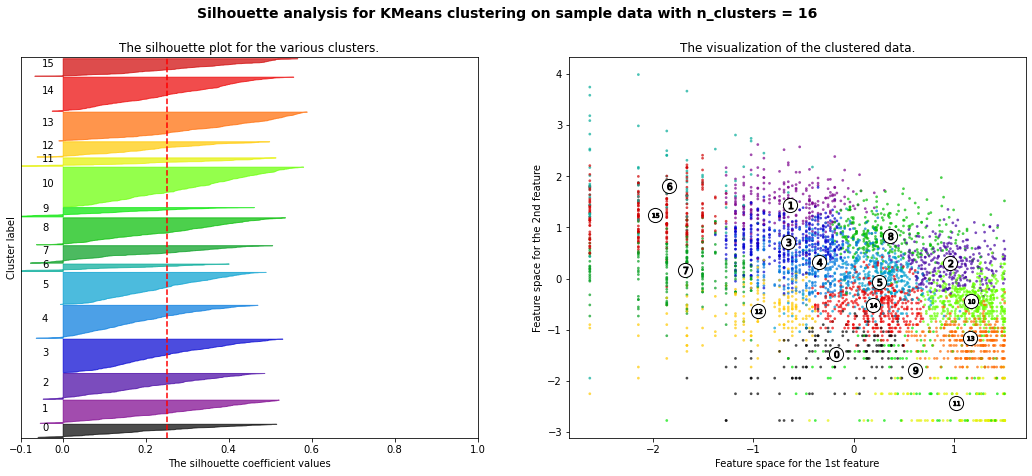

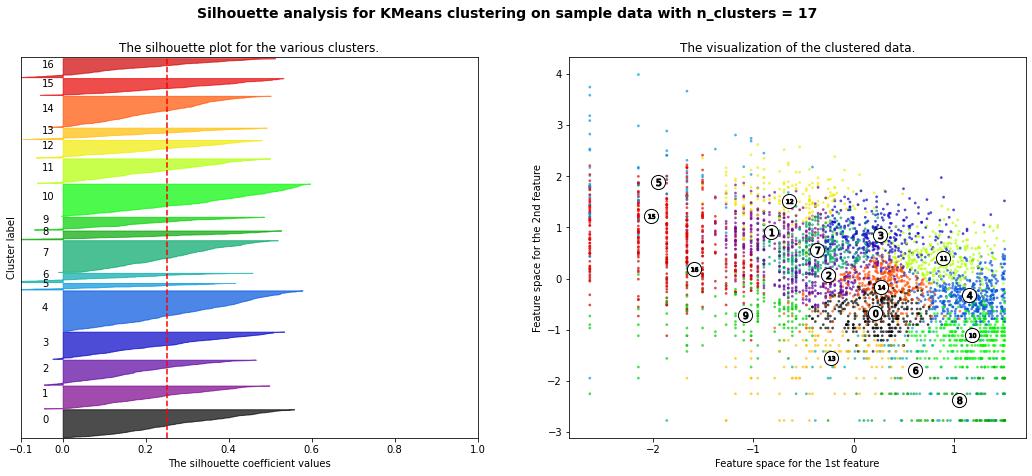

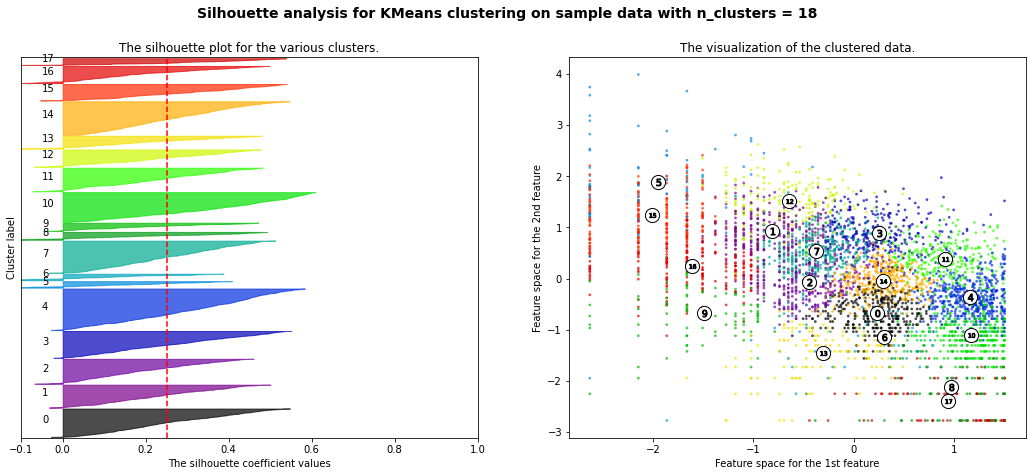

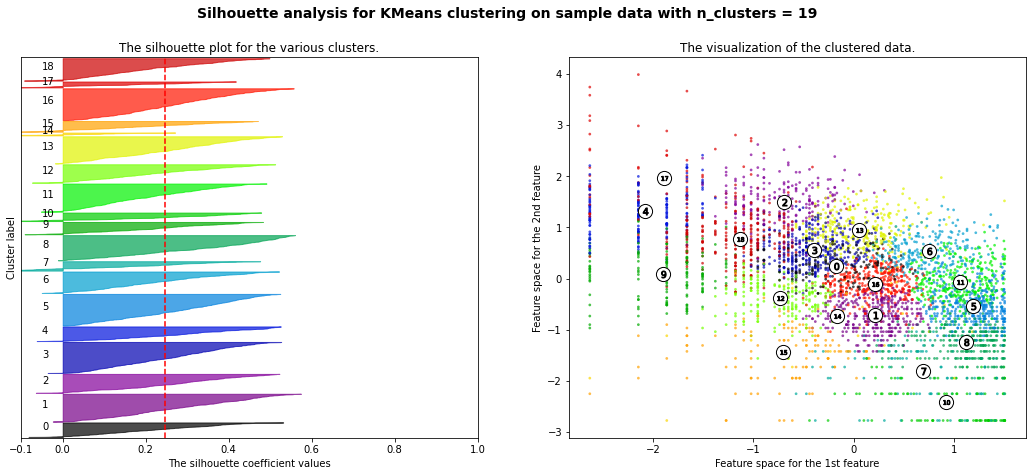

In [55]:
for n_clusters in range(2, 20):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [78]:
# 9 elbow and davies have different outputs (elbow = 7, davies = 2, silhouette = 2)

In [79]:
# 10 Write down your observations.
# 11 If it is hard to decide for the best number of k, undo the log scaling and try clustering again.
# 12 Determine what makes sense in the clustering, and decide what the best k is.
# 13 To help you further, create a boxplot of clusters for each k for every RFM measure. The less the variance (or thickness of boxplot) the better.

In [56]:
# 13
kmeans2 = KMeans(n_clusters=2, max_iter=1000,random_state=10).fit(X_scaled)

In [57]:
kmeans7 = KMeans(n_clusters=7, max_iter=1000,random_state=10).fit(X_scaled)

In [58]:
df_RFM['k2'] = kmeans2.labels_
df_RFM['k7'] = kmeans7.labels_

In [59]:
df_RFM.head()

Recency  Frequency   Monetary  k2  k7
CustomerID                                        
12346       5.786897   0.000000  11.253942   0   3
12347       0.693147   5.204007   8.368693   1   4
12348       4.317488   3.433987   7.494007   0   3
12349       2.944439   4.290459   7.471676   1   0
12350       5.736572   2.833213   5.812338   0   1

<AxesSubplot:xlabel='k2', ylabel='Recency'>

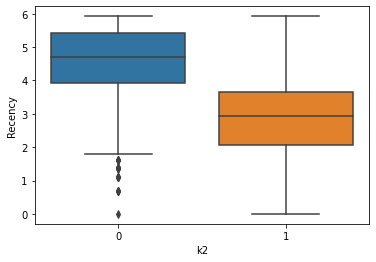

In [60]:
sns.boxplot(x='k2', y ='Recency', data = df_RFM)

<AxesSubplot:xlabel='k7', ylabel='Recency'>

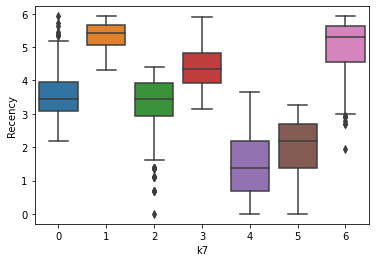

In [61]:
sns.boxplot(x='k7', y ='Recency', data = df_RFM)

<AxesSubplot:xlabel='k2', ylabel='Frequency'>

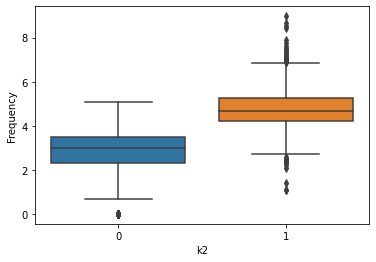

In [62]:
sns.boxplot(x='k2', y ='Frequency', data = df_RFM)

<AxesSubplot:xlabel='k7', ylabel='Frequency'>

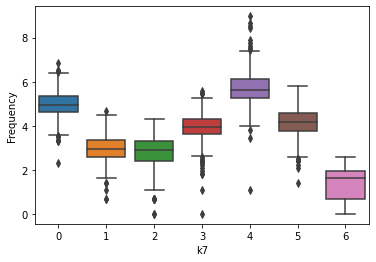

In [63]:
sns.boxplot(x='k7',y ='Frequency', data = df_RFM)

<AxesSubplot:xlabel='k2', ylabel='Monetary'>

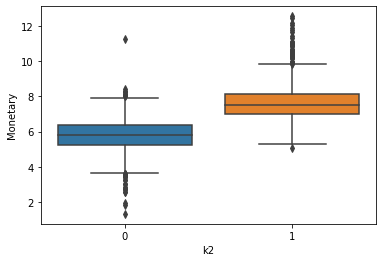

In [64]:
sns.boxplot(x='k2', y ='Monetary', data = df_RFM)

<AxesSubplot:xlabel='k7', ylabel='Monetary'>

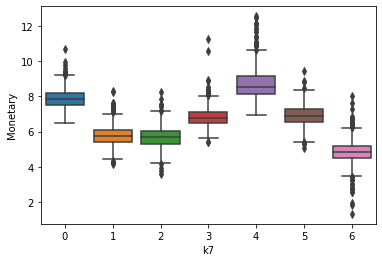

In [65]:
sns.boxplot(x='k7', y ='Monetary', data = df_RFM)

### Supplementing with Market Basket Analysis

1. Run this code to generate an encoded item listing:

In [66]:
new_df = df

In [67]:
items = list(new_df.Description.unique())
grouped = new_df.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)

2. What can you say about the `transaction_df` DataFrame?
3. Transpose the DataFrame and get only the 20 most products bought on 100 first transactions.
4. Implement the Apriori and FP Growth Algorithms.
5. Write down your observations.

In [94]:
#2 What can you say about the transaction_df DataFrame?


In [68]:
# 3
transaction_df_T = transaction_df.T
transaction_df_T['sum'] = transaction_df_T.sum(axis=1)
transaction_df_T = transaction_df_T.sort_values(by=['sum'], ascending=False)
transaction_df_T_20 = transaction_df_T[:20]
transaction_df_T_20 = transaction_df_T_20.drop(['sum'], axis=1)
trans = transaction_df_T_20.T
trans = trans[:100]

In [69]:
# 4
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_ap = apriori(trans, min_support=0.01, use_colnames=True)
frequent_itemsets_fp = fpgrowth(trans, min_support=0.01, use_colnames=True)

In [70]:
from mlxtend.frequent_patterns import association_rules
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

In [71]:
rules_ap

antecedents  \
0                              (LUNCH BAG SUKI DESIGN )   
1                             (LUNCH BAG  BLACK SKULL.)   
2                                 (LUNCH BAG CARS BLUE)   
3                                 (LUNCH BAG CARS BLUE)   
4                                 (LUNCH BAG CARS BLUE)   
...                                                 ...   
1517       (LUNCH BAG SPACEBOY DESIGN , POPCORN HOLDER)   
1518  (LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIGN )   
1519  (PAPER CHAIN KIT 50'S CHRISTMAS , LUNCH BAG SU...   
1520  (PAPER CHAIN KIT 50'S CHRISTMAS , LUNCH BAG  B...   
1521  (PAPER CHAIN KIT 50'S CHRISTMAS , LUNCH BAG CA...   

                                            consequents  antecedent support  \
0                             (LUNCH BAG  BLACK SKULL.)                0.03   
1                              (LUNCH BAG SUKI DESIGN )                0.03   
2                             (LUNCH BAG  BLACK SKULL.)                0.02   
3                              (LUNCH BAG SUKI DESIGN )                0.02   
4                                      (POPCORN HOLDER)                0.02   
...                                                 ...                 ...   
1517  (LUNCH BAG RED RETROSPOT, PAPER CHAIN KIT 50'S...                0.01   
1518  (LUNCH BAG RED RETROSPOT, PAPER CHAIN KIT 50'S...                0.01   
1519  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...                0.01   
1520  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...                0.01   
1521  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...                0.01   

      consequent support  support  confidence        lift  leverage  \
0                   0.03     0.03         1.0   33.333333    0.0291   
1                   0.03     0.03         1.0   33.333333    0.0291   
2                   0.03     0.02         1.0   33.333333    0.0194   
3                   0.03     0.02         1.0   33.333333    0.0194   
4                   0.07     0.02         1.0   14.285714    0.0186   
...                  ...      ...         ...         ...       ...   
1517                0.01     0.01         1.0  100.000000    0.0099   
1518                0.01     0.01         1.0  100.000000    0.0099   
1519                0.01     0.01         1.0  100.000000    0.0099   
1520                0.01     0.01         1.0  100.000000    0.0099   
1521                0.01     0.01         1.0  100.000000    0.0099   

      conviction  
0            inf  
1            inf  
2            inf  
3            inf  
4            inf  
...          ...  
1517         inf  
1518         inf  
1519         inf  
1520         inf  
1521         inf  

[1522 rows x 9 columns]

In [72]:
rules_fp

antecedents  \
0     (ASSORTED COLOUR BIRD ORNAMENT, PAPER CHAIN KI...   
1     (LUNCH BAG RED RETROSPOT, WHITE HANGING HEART ...   
2     (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...   
3     (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIGN )   
4     (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...   
...                                                 ...   
1517  (PAPER CHAIN KIT 50'S CHRISTMAS , LUNCH BAG  B...   
1518  (PAPER CHAIN KIT 50'S CHRISTMAS , LUNCH BAG CA...   
1519  (ASSORTED COLOUR BIRD ORNAMENT, REGENCY CAKEST...   
1520  (ASSORTED COLOUR BIRD ORNAMENT, WHITE HANGING ...   
1521  (REGENCY CAKESTAND 3 TIER, WHITE HANGING HEART...   

                                            consequents  antecedent support  \
0                     (PACK OF 72 RETROSPOT CAKE CASES)                0.01   
1                          (LUNCH BAG SPACEBOY DESIGN )                0.01   
2                          (LUNCH BAG SPACEBOY DESIGN )                0.01   
3                             (LUNCH BAG  BLACK SKULL.)                0.01   
4                              (LUNCH BAG SUKI DESIGN )                0.01   
...                                                 ...                 ...   
1517  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...                0.01   
1518  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...                0.01   
1519               (WHITE HANGING HEART T-LIGHT HOLDER)                0.01   
1520                         (REGENCY CAKESTAND 3 TIER)                0.01   
1521                    (ASSORTED COLOUR BIRD ORNAMENT)                0.01   

      consequent support  support  confidence        lift  leverage  \
0                   0.07     0.01         1.0   14.285714    0.0093   
1                   0.03     0.01         1.0   33.333333    0.0097   
2                   0.03     0.01         1.0   33.333333    0.0097   
3                   0.03     0.01         1.0   33.333333    0.0097   
4                   0.03     0.01         1.0   33.333333    0.0097   
...                  ...      ...         ...         ...       ...   
1517                0.01     0.01         1.0  100.000000    0.0099   
1518                0.01     0.01         1.0  100.000000    0.0099   
1519                0.11     0.01         1.0    9.090909    0.0089   
1520                0.08     0.01         1.0   12.500000    0.0092   
1521                0.08     0.01         1.0   12.500000    0.0092   

      conviction  
0            inf  
1            inf  
2            inf  
3            inf  
4            inf  
...          ...  
1517         inf  
1518         inf  
1519         inf  
1520         inf  
1521         inf  

[1522 rows x 9 columns]